In [13]:
import numpy as np
import torch
import torchvision

In [14]:
Transform = torchvision.transforms.Compose([torchvision.transforms. Grayscale(num_output_channels=1),torchvision.transforms .ToTensor()]) 
trainingdata = torchvision.datasets.CIFAR10(root='./ data', train=True, download=True, transform=Transform) 
testdata = torchvision.datasets.CIFAR10(root='./data',  train=False, download=True, transform=Transform)


Files already downloaded and verified
Files already downloaded and verified


In [15]:
print(len(trainingdata))
print(len(testdata))

50000
10000


In [16]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 32, 32]) 6


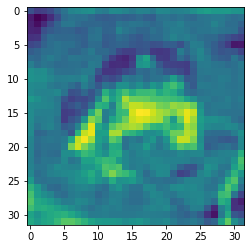

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()


In [18]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

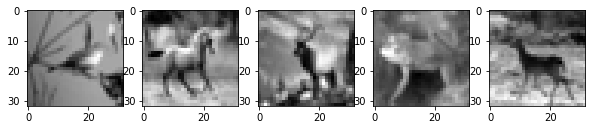

In [19]:
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [20]:
class DenseNeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(DenseNeuralNetwork, self).__init__()
    self.hidden = torch.nn.Linear(32*32,256)
    self.hidden1 = torch.nn.Linear(256,128)
    self.hidden2 = torch.nn.Linear(128,64)
    self.output=torch.nn.Linear(64,10)
    self.relu=torch.nn.ReLU()

  def forward(self, x):
    x = x.view(-1,32*32)
    x=self.hidden(x)
    x=self.relu(x)
    x=self.hidden1(x)
    x=self.relu(x)
    x=self.hidden2(x)
    x=self.relu(x)

    return x
   

net = DenseNeuralNetwork().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [21]:
train_loss_history = []
test_loss_history = []

for epoch in range(100):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 3.0621316929912323, Test loss 2.9262610590381986
Epoch 1, Train loss 2.888261735286859, Test loss 2.8587164635870868
Epoch 2, Train loss 2.8361302909948636, Test loss 2.823893615394641
Epoch 3, Train loss 2.8031329148260835, Test loss 2.79541151386917
Epoch 4, Train loss 2.7802894036178394, Test loss 2.7775866939763354
Epoch 5, Train loss 2.75677518618991, Test loss 2.7455592383244993
Epoch 6, Train loss 2.7319584545272084, Test loss 2.7225995686403506
Epoch 7, Train loss 2.676791508331933, Test loss 2.5415919662281206
Epoch 8, Train loss 2.3837702769757536, Test loss 2.360908859854291
Epoch 9, Train loss 2.3436431518905914, Test loss 2.373130173440192
Epoch 10, Train loss 2.315135740867966, Test loss 2.315472754703206
Epoch 11, Train loss 2.2913208076411196, Test loss 2.288486706982752
Epoch 12, Train loss 2.2696201539100587, Test loss 2.269598309401494
Epoch 13, Train loss 2.2488730866890734, Test loss 2.248032935865366
Epoch 14, Train loss 2.229080397454674, Test

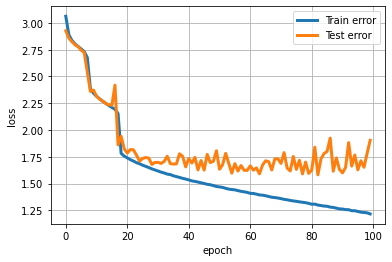

In [22]:
plt.plot(range(100),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(100),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [23]:
#Test Accuracy
images=images.type(torch.FloatTensor)
images=images.cuda()
predicted_output = net(images)
print(torch.max(predicted_output, 1))
fit = Loss(predicted_output, labels)
pred= predicted_output.max(1).indices
act=len(images)
accuracy=0
for i in range(len(images)):
  if(pred[i]==labels[i]):
     accuracy=accuracy+1
Acc=(accuracy/act)*100
print("Accuracy of the developed dense neural network model: ",Acc, "%")

torch.return_types.max(
values=tensor([10.9884, 12.7974, 10.7631, 13.4263, 20.9449, 12.3383, 16.3065, 15.1576,
        14.1354, 13.8998, 11.0703, 14.6388,  9.9850, 10.7669, 12.2893, 12.9262],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([7, 5, 8, 0, 8, 0, 7, 0, 8, 7, 3, 3, 3, 5, 5, 7], device='cuda:0'))
Accuracy of the developed dense neural network model:  68.75 %


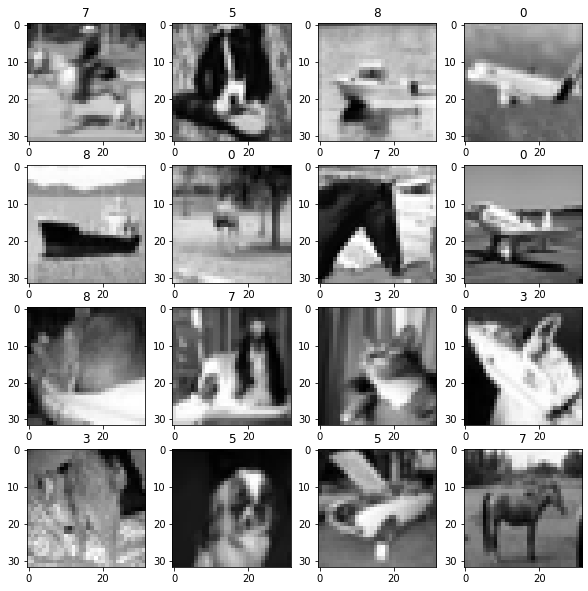

In [24]:
plt.figure(figsize=(10,10))
for index in np.arange(0,16):
  plt.subplot(4,4,index+1)
  plt.imshow(images[index].cpu().squeeze().numpy(),cmap=plt.cm.gray)
  plt.title(pred[index].item())